In [138]:
import socket
import sys
import struct
import numpy as np
from matplotlib import pyplot as plt

In [5]:
HOST, PORT = "sword.qblab.science", 50007

# Create a socket (SOCK_STREAM means a TCP socket)
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Connect to server and send dat
sock.connect((HOST, PORT))

In [157]:
def recv_msg(sock):
    raw_msglen = recvall(sock, 4) # read data size < 1G
    if not raw_msglen:
        return None
    msglen = struct.unpack('>I', raw_msglen)[0]
    raw_width = recvall(sock, 2) # read image shape
    width = struct.unpack('>H', raw_width)
    raw_height = recvall(sock, 2) # read image shape
    height = struct.unpack('>H', raw_height)
    return (height, width), recvall(sock, msglen)

In [143]:
# Helper function to recv n bytes or return None if EOF is hit
def recvall(sock, n):
    data = b''
    while len(data) < n:
        packet = sock.recv(n-len(data))
        if not packet:
            return None
        data += packet
    return data

0
1
2
3
4
5
6
7
8
9


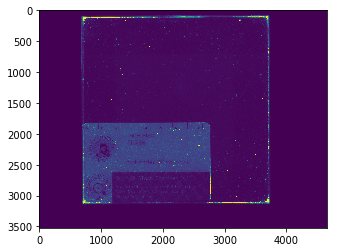

In [167]:
xxx = []
for i in range(10):
    xxx.append(recv_msg(sock))
    b2i(xxx[-1][1])
    print(i)

array([[ 16,  16, 112, ...,  16, 112,  32],
       [ 32,  16,  16, ...,  16,  16,  16],
       [ 48,  16,  16, ...,  16,  16,  16],
       ...,
       [ 16,  48,  16, ...,  16,  16,  16],
       [ 16,  16,  16, ...,  96,  80,  16],
       [ 16,  16,  16, ...,  16,  16,  16]], dtype=uint16)

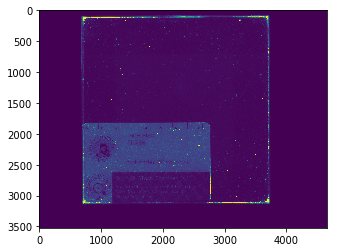

In [162]:
b2i(xx[1])

In [76]:
def b2i(raw):
    image_flat = np.frombuffer(raw, dtype=np.uint16)
    plt.imshow(image_flat.reshape([3522, 4656]))
    return image_flat.reshape([3522, 4656])